In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import os
import time
import math
# ROOT.enableJSVis()
c1 = ROOT.TCanvas()
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")
import pandas as pd

Welcome to JupyROOT 6.22/02


In [2]:
infile = ROOT.TFile("/data/ppc/ortecppc/T1/SCAN100016/SCAN100016_1.root")
tree = infile.Get("T1")
nevent = ROOT.NEvent()
tree.SetBranchAddress("NEvent",nevent)
num_files = (tree.GetEntries())

blrPulse = ROOT.NPulse()
blrFilter = ROOT.NFBaselineRemover(1000) 
trapPulse = ROOT.NPulse() 
hval = ROOT.TH1F("hval","hval",200,64,82)

for i in range (num_files):
    tree.GetEntry(i)
    npulse = nevent.GetPulse(0)
    blrFilter.Filter(npulse,blrPulse)
    baseline = blrFilter.GetCalcParameterByName("Baseline")
    trapFilter = ROOT.NFTrapezoid(750,250,0,baseline)
    trapFilter.Filter(blrPulse,trapPulse)
    val = trapFilter.GetCalcParameterByName("Max")
    if (64<val<82):
        hval.Fill(val)


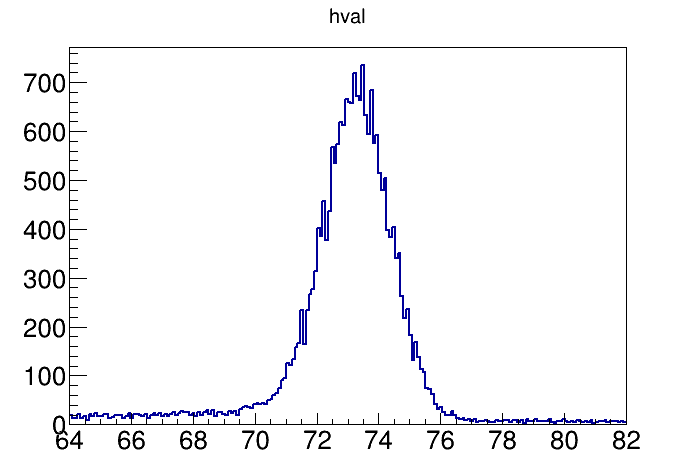

In [4]:
hval.Draw()
c1.Draw()
hval.GetXaxis().SetLabelSize(0.06)
hval.GetYaxis().SetLabelSize(0.06)
hval.GetXaxis().SetTitleSize(444)
hval.GetYaxis().SetTitleSize(444)
hval.GetZaxis().SetLabelSize(0.05)
hval.SetStats(0)
hval.SetLineWidth(2)
c1.Draw()